In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from numpy import cos, sin
import math

import subprocess
import os
import time

In [4]:
class Line:
    def __init__(self, *args):
        if len(args) == 3:
            self.a, self.b, self.c = args
        elif len(args) == 2:
            (x1, y1), (x2, y2) = args
            self.a = y2 - y1
            self.b = x1 - x2
            self.c = (x2 * y1 - x1 * y2)
        
        else:
            raise ValueError("Provide either 2 points or 3 coefficients (A, B, C).")

    def is_vertical(self):
        return self.b == 0

    def is_horizontal(self):
        return self.a == 0

    def general_form(self):
        return f"{self.a}x + {self.b}y + {self.c} = 0"

    def plot_line(self):
        x = np.linspace(-10, 10, 100)

        if self.is_vertical():
            x_val = -self.c / self.a  
            plt.axvline(x=x_val, color='b', label='Line')  
        else:
            y = (-self.c - self.a * x) / self.b 
            plt.plot(x, y, label='Line')

        plt.xlim(-10, 10)
        plt.ylim(-10, 10)

        plt.quiver(0, 0, -self.b, self.a, angles='xy', scale_units='xy', scale=1, color='r', label='Direction Vector')
        plt.quiver(0, 0, self.a, self.b, angles='xy', scale_units='xy', scale=1, color='g', label='Normal Vector')

        plt.axhline(0, color='black', lw=0.5)
        plt.axvline(0, color='black', lw=0.5)
        plt.grid()
        plt.legend()
        plt.show()

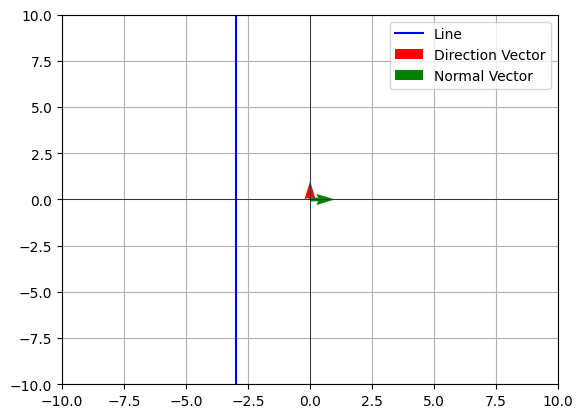

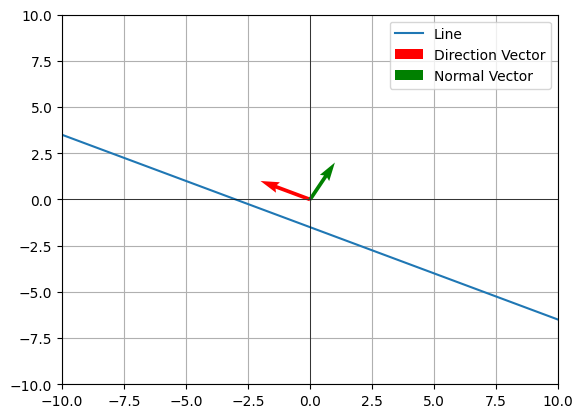

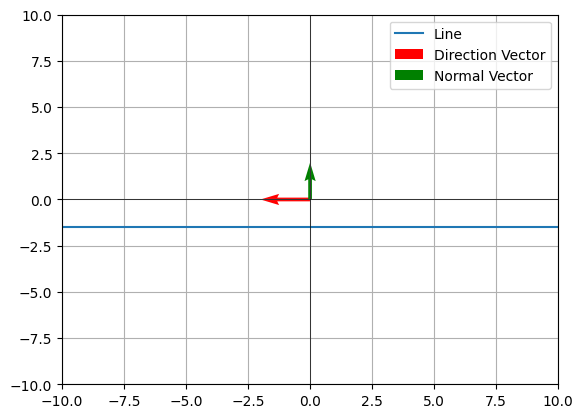

In [7]:
Line(1, 0, 3).plot_line()
Line(1, 2, 3).plot_line()
Line(0, 2, 3).plot_line()

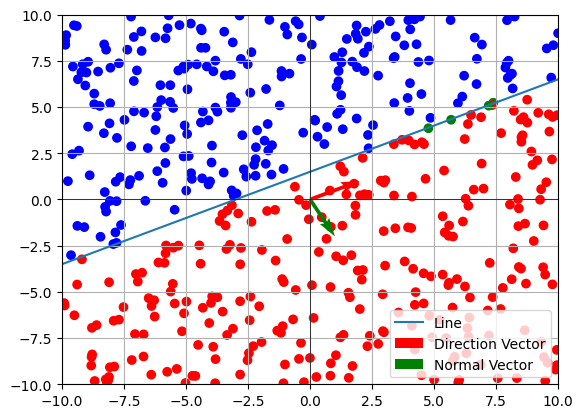

In [5]:
EPSILON = 0.1
def color_points(points, line):
    colors = []
    for (x, y) in points:
        line_value = line.a * x + line.b * y + line.c
        if line_value <= EPSILON and line_value >= -EPSILON:
            colors.append('green')  
        elif line_value > EPSILON:
            colors.append('red')  
        else:
            colors.append('blue') 
    return colors

points = np.random.rand(500, 2) * 20 - 10

line = Line(1, -2, 3)
colors = color_points(points, line)

plt.scatter(points[:, 0], points[:, 1], c=colors)
plot_line(line)
plt.show()

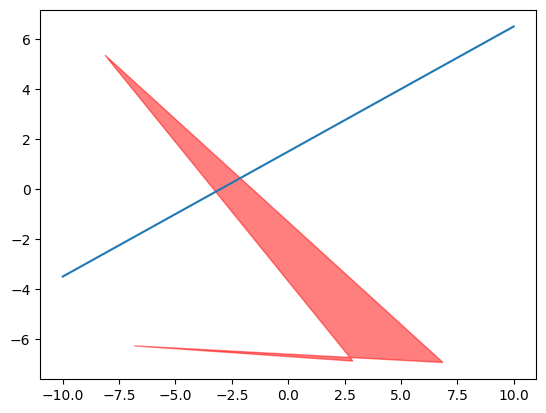

In [7]:
num_vertices = 4
flag = False

def generate_polygon(num_vertices):
    return np.random.rand(num_vertices, 2) * 20 - 10

def plot_line(line):
    x = np.linspace(-10, 10, 100)
    y = (-line.c - line.a * x) / line.b 
    plt.plot(x, y, label='Line')

def isPolygonIntersectsWithLine(polygon, line):
    for i in range(num_vertices-1):
        x1,y1 = polygon[i]
        x2,y2 = polygon[i+1]
        if (x1 < x2):
            x = np.linspace(x1,x2,100)
        else:
            x = np.linspace(x2,x1,100)
        if (y1 < y2):
            y = np.linspace(y1,y2,100)
        else:
            y = np.linspace(y2,y1,100)
        calculated = line.a * x + line.b * y + line.c
        for (ys, yc) in zip(calculated, y):
            if (abs(ys - yc) <= EPSILON and ys - yc >= -EPSILON):
                return True
        
    return False

def plot_polygon(polygon, line):  
    global flag
    flag = flag or isPolygonIntersectsWithLine(polygon, line) 
    if (flag):
        plt.fill(polygon[:, 0], polygon[:, 1], alpha=0.5, color='red')
        return
    
    plt.fill(polygon[:, 0], polygon[:, 1], alpha=0.5, color='gray')

polygon = generate_polygon(num_vertices)
plot_line(line)

plot_polygon(polygon, line)
plt.show()

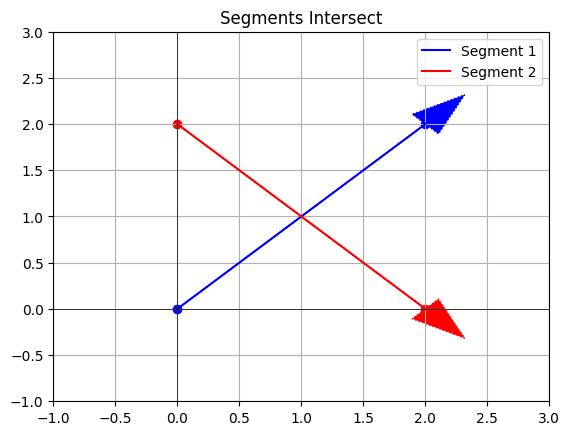

In [8]:


def S(p1,p2,p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])


def IsRelativePositionOfTwoSegments(segment1, segment2):
    p1, p2 = segment1
    p3, p4 = segment2

    s1 = S(p1, p2, p3)
    s2 = S(p1, p2, p4)
    s3 = S(p3, p4, p1)
    s4 = S(p3, p4, p2)
    
    if s1 * s2 <= 0 and s3 * s4 <= 0:
        return True
    return False
                
            
    
    

def plot_segments(segment1, segment2):
    plt.plot(segment1[:, 0], segment1[:, 1], 'b-', label='Segment 1')
    plt.plot(segment2[:, 0], segment2[:, 1], 'r-', label='Segment 2')
    
    plt.scatter(segment1[:, 0], segment1[:, 1], color='blue')
    plt.scatter(segment2[:, 0], segment2[:, 1], color='red')
    
    p1, p2 = segment1
    p3, p4 = segment2
    
    plt.arrow(p1[0], p1[1], p2[0]-p1[0], p2[1]-p1[1], head_width=0.3, color='blue', linestyle='dotted')
    plt.arrow(p3[0], p3[1], p4[0]-p3[0], p4[1]-p3[1], head_width=0.3, color='red', linestyle='dotted')
    
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid()
    plt.legend()
    plt.xlim(-1, 3)
    plt.ylim(-1, 3)
    
    if IsRelativePositionOfTwoSegments(segment1, segment2):
        plt.title('Segments Intersect')
    else:
        plt.title('Segments Do Not Intersect')
    

segment1 = np.array([[0, 0], [2, 2]])
segment2 = np.array([[0, 2], [2, 0]])
plot_segments(segment1, segment2)
plt.show()

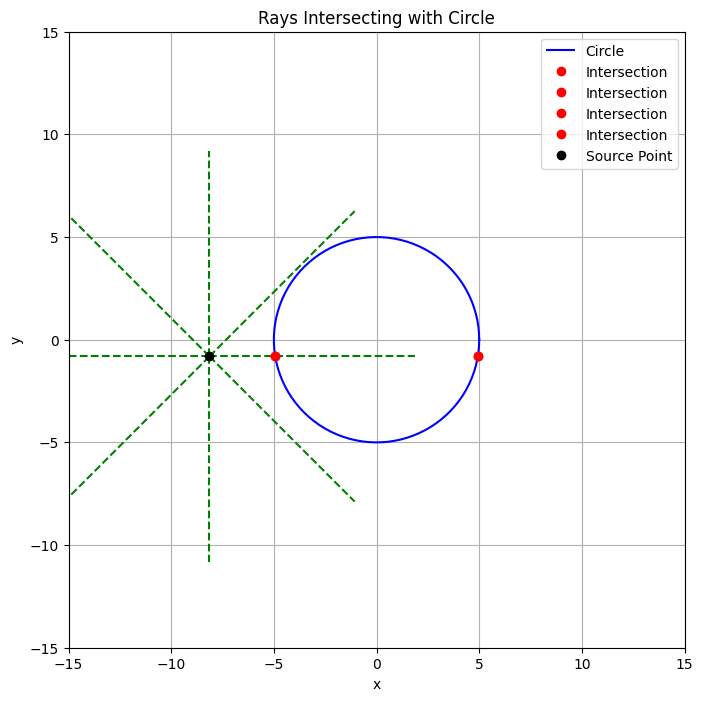

In [9]:
def circle_equation(x_c, y_c, r, num_points=100):
    theta = np.linspace(0, 2 * np.pi, num_points)
    x = x_c + r * np.cos(theta)
    y = y_c + r * np.sin(theta)
    return x, y

def ray_circle_intersection(x0, y0, dx, dy, x_c, y_c, r):
    a = dx**2 + dy**2
    b = 2 * (dx * (x0 - x_c) + dy * (y0 - y_c))
    c = (x0 - x_c)**2 + (y0 - y_c)**2 - r**2
    
    D = b**2 - 4 * a * c  
    
    if D < 0:
        return []  
    elif D == 0:
        t = -b / (2 * a)
        return [(x0 + t * dx, y0 + t * dy)] 
    else:
        t1 = (-b + np.sqrt(D)) / (2 * a)
        t2 = (-b - np.sqrt(D)) / (2 * a)
        return [(x0 + t1 * dx, y0 + t1 * dy), (x0 + t2 * dx, y0 + t2 * dy)]

def plot_circle_and_rays(x_c, y_c, r, x0, y0, num_rays=8):
    fig, ax = plt.subplots(figsize=(8, 8))  
    
    x_circle, y_circle = circle_equation(x_c, y_c, r)
    ax.plot(x_circle, y_circle, 'b-', label='Circle')
    
    for i in range(num_rays):
        angle = i * (2 * np.pi / num_rays)
        dx = np.cos(angle)
        dy = np.sin(angle)
        
        intersections = ray_circle_intersection(x0, y0, dx, dy, x_c, y_c, r)
        
        t = np.linspace(0, 10, 100)  
        x_ray = x0 + t * dx
        y_ray = y0 + t * dy
        ax.plot(x_ray, y_ray, 'g--')
        
        for (x_int, y_int) in intersections:
            ax.plot(x_int, y_int, 'ro', label='Intersection')
    
    ax.plot(x0, y0, 'ko', label='Source Point')
    
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Rays Intersecting with Circle')
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    
    plt.show()

x_c, y_c = 0, 0 
r = 5            
x0, y0 = np.random.rand(2,1) * 30 - 15 

plot_circle_and_rays(x_c, y_c, r, x0, y0)